In [7]:
import importlib.util
spec = importlib.util.spec_from_file_location("BoundaryLayerToolbox", "/Users/claudiopierard/VC/BoundaryLayerToolbox.py")
blt = importlib.util.module_from_spec(spec)
spec.loader.exec_module(blt)

In [8]:
import matplotlib
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy as spy
import scipy.io as sio
import scipy.optimize as optimization
import scipy.interpolate as interpolate
from netCDF4 import Dataset
import os
import pandas as pd
pd.set_option('html', False)
from IPython import display
from matplotlib import animation
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline

In [9]:
xlat = np.loadtxt("/Users/claudiopierard/VC/datos/xlat_d02_interpolado.txt")
xlong = np.loadtxt("/Users/claudiopierard/VC/datos/xlong_d02_interpolado.txt")
hgt = np.loadtxt("/Users/claudiopierard/VC/datos/hgt_d02_interpolado.txt")

In [10]:
xlat_cca, xlong_cca =19.3262,  -99.1761

In [11]:
cca_x, cca_y = blt.near_coord_loc(xlong, xlat, xlong_cca, xlat_cca)

# CCA perfiles Brunt-Väisälä

### Feb

In [12]:
feb_24 = h5py.File("/Volumes/BUFFALO_SOLDIER/datos_NN/cca/02/feb_NN_24_cca.h5", 'r')
feb_48 = h5py.File("/Volumes/BUFFALO_SOLDIER/datos_NN/cca/02/feb_NN_48_cca.h5", 'r')

In [13]:
nn_24 = np.array(feb_24.get('NN_24'))
pblh_24 = np.array(feb_24.get('PBLH_24'))
z_24 = np.array(feb_24.get('Z_24'))

### Jan

In [14]:
jan_24 = h5py.File("/Volumes/BUFFALO_SOLDIER/datos_NN/cca/01/jan_NN_24_cca.h5", 'r')
jan_48 = h5py.File("/Volumes/BUFFALO_SOLDIER/datos_NN/cca/01/jan_NN_48_cca.h5", 'r')

In [15]:
nn_24 = np.array(jan_24.get('NN_24'))
pblh_24 = np.array(jan_24.get('PBLH_24'))
z_24 = np.array(jan_24.get('Z_24'))

In [16]:
nn_48 = np.array(jan_48.get('NN_48'))
pblh_48 = np.array(jan_48.get('PBLH_48'))
z_48 = np.array(jan_48.get('Z_48'))

In [17]:
nn_24[0,0,0]

0.000458641501609236

In [18]:
pblh_24.shape

(17, 24)

In [19]:
z_24.shape

(17, 24, 49)

In [20]:
z_24[0,:,:25].shape

(24, 25)

In [21]:
nn_48[4,5,6]

7.3021117714233696e-05

In [22]:
cmap = plt.cm.rainbow #matplotlib.colors.ListedColormap(['black','yellow', 'red', 'blue', 'white', 'green'])
# extract all colors from the .rainbow map
cmaplist = [cmap(i) for i in range(cmap.N)]
# create the new map
cmap = cmap.from_list('Custom cmap', cmaplist, cmap.N)
# define the bins and normalize
bounds = np.linspace(0,24, 9)
norm = matplotlib.colors.BoundaryNorm(bounds, cmap.N)

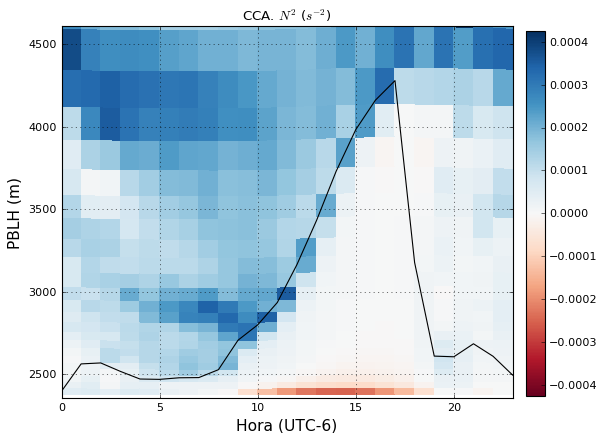

In [23]:
ym = z_48[0, :, :25]
xm, trash =np.mgrid[range(0,24), range(0,25)]

if nn_48[0,:, :25].max() > np.abs(nn_48[0,:, :25].min()):
    max_NN = nn_48[0,:, :25].max()
    
elif nn_48[0,:, :25].max() < np.abs(nn_48[0,:, :25].min()):
    max_NN = np.abs(nn_48[0,:, :25].min())

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

#main plot
#im = ax.pcolormesh(xm, ym, cca_density[:, :24])
im = ax.pcolormesh(xm, ym, nn_48[0,:, :25], norm= colors.Normalize(vmin=-max_NN ,vmax=max_NN), cmap = 'RdBu')

#colorbar
fig.subplots_adjust(right=0.83)
cbar_ax = fig.add_axes([0.85, 0.13, 0.03, 0.76])
fig.colorbar(im, cax=cbar_ax)

#limits
ax.set_xlim(0,23)
ax.set_ylim(hgt[cca_x, cca_y], max(z_48[0,:, 23]))

#Pblh curve
ax.plot(pblh_48[0, :] + hgt[cca_x, cca_y], color = 'k')
#ax.fill_between(range(24), 2500 + HGT[0,0,0],  PBLH[:, 0,0] + HGT[0,0,0], color = 'white')

#Format
ax.grid()
ax.set_ylabel('PBLH (m)', fontsize = 14)
ax.set_xlabel('Hora (UTC-6)', fontsize = 14)
ax.set_title('CCA. $N^2$ ($s^{-2}$)')
#ax.ticklabel_format(style = 'sci')
fig.savefig("cca_15_01_2015.png")

### Mar

In [24]:
import pandas as pd

In [25]:
mar_DF = pd.read_csv("/Users/claudiopierard/VC/datos/dataframes/cca/mar_dataframe_cca.csv", index_col=0)

In [26]:
mar_DF.index = pd.to_datetime(mar_DF.index)

In [33]:
mar_DF["2015-03-02 00:00:00":"2015-03-04"]['Raw_mean'].shape

(72,)

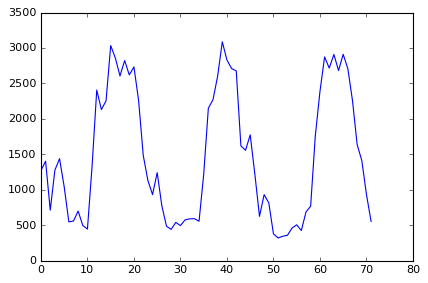

In [34]:
plt.plot(range(0,72), mar_DF["2015-03-02 00:00:00":"2015-03-04"]['Raw_mean'])

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors


def make_colormap(seq):
    """Return a LinearSegmentedColormap
    seq: a sequence of floats and RGB-tuples. The floats should be increasing
    and in the interval (0,1).
    """
    seq = [(None,) * 3, 0.0] + list(seq) + [1.0, (None,) * 3]
    cdict = {'red': [], 'green': [], 'blue': []}
    for i, item in enumerate(seq):
        if isinstance(item, float):
            r1, g1, b1 = seq[i - 1]
            r2, g2, b2 = seq[i + 1]
            cdict['red'].append([item, r1, r2])
            cdict['green'].append([item, g1, g2])
            cdict['blue'].append([item, b1, b2])
    return mcolors.LinearSegmentedColormap('CustomMap', cdict)


In [36]:
mar_24 = h5py.File("/Volumes/BUFFALO_SOLDIER/datos_NN/cca/03/mar_NN_24_cca.h5", 'r')
mar_48 = h5py.File("/Volumes/BUFFALO_SOLDIER/datos_NN/cca/03/mar_NN_48_cca.h5", 'r')

In [37]:
nn_24 = np.array(mar_24.get('NN_24'))
pblh_24 = np.array(mar_24.get('PBLH_24'))
z_24 = np.array(mar_24.get('Z_24'))

In [38]:
nn_48 = np.array(mar_48.get('NN_48'))
pblh_48 = np.array(mar_48.get('PBLH_48'))
z_48 = np.array(mar_48.get('Z_48'))

In [39]:
nn_24.max()

0.00114269251935184

In [40]:
pblh_24.shape

(31, 24)

In [41]:
24*3

72

In [42]:
new_nn_24 = np.reshape(nn_24[1:4,:,:], (72,48))
new_z_24 = np.reshape(z_24[1:4,:,:], (72,49))
new_pblh_24 = np.reshape(pblh_24[1:4,:], (72))

In [43]:
max_NN = new_nn_24[:, :27].max()
minx_NN = new_nn_24[:, :27].min()
cero_pos = abs(minx_NN)/(max_NN + abs(minx_NN))
print(cero_pos)

0.204696924552


In [44]:
ϵ = 0.03
c = mcolors.ColorConverter().to_rgb
rvb = make_colormap([c('blue'), c('cyan'), cero_pos + ϵ, c('yellow'), c('red')])
#N = 1000
#array_dg = np.random.uniform(0, 10, size=(N, 2))
#colors = np.random.uniform(-1, 1, size=(N,))
#plt.scatter(array_dg[:, 0], array_dg[:, 1], c=colors, cmap=rvb)
#plt.colorbar()

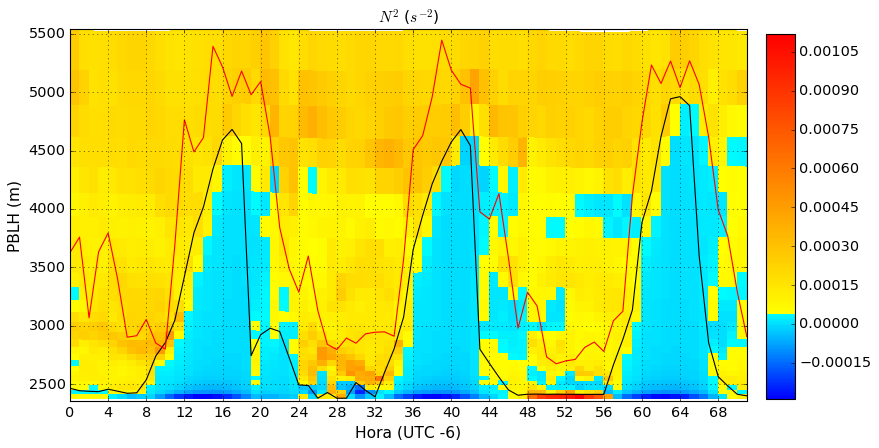

In [47]:
ym = new_z_24[:, :27]
xm, trash =np.mgrid[range(0,72), range(0,27)]

fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)

#main plot
#im = ax.pcolormesh(xm, ym, cca_density[:, :24])
im = ax.pcolormesh(xm, ym, new_nn_24[:, :27], cmap = rvb)#, norm= mcolors.Normalize(vmin=-max_NN ,vmax=max_NN))

#colorbar
fig.subplots_adjust(right=0.83)
cbar_ax = fig.add_axes([0.85, 0.13, 0.03, 0.76])
fig.colorbar(im, cax=cbar_ax)

#limits
ax.set_xlim(0,71)
ax.set_ylim(hgt[cca_x, cca_y], max(new_z_24[:, 26]))

#Pblh curve
ax.plot(new_pblh_24[ :] + hgt[cca_x, cca_y], color = 'k')
#ax.fill_between(range(24), 2700 + HGT[0,0,0],  PBLH[:, 0,0] + HGT[0,0,0], color = 'white')
ax.plot(range(0,72), mar_DF["2015-03-02 00:00:00":"2015-03-04"]['Raw_mean'] + hgt[cca_x, cca_y], color = 'r')
#Format
plt.rcParams.update({'font.size': 13})
ax.grid()
ax.set_ylabel('PBLH (m)', fontsize = 14)
ax.set_xlabel('Hora (UTC -6)', fontsize = 14)
ax.set_title('$N^2$ ($s^{-2}$)', fontsize = 14)
ax.set_xticks(range(0,72,4))
#ax.ticklabel_format(style = 'sci')
fig.savefig("cca_15_01_2015.png")

------------

In [27]:
from netCDF4 import Dataset

In [95]:
file_test = Dataset("/Volumes/BUFFALO_SOLDIER/datos_WRF/05/coef/Cl_wrfout_d02_2015-05-08_00.nc", 'r')

In [123]:
ph = np.array(file_test.variables['PH'])
phb = np.array(file_test.variables['PHB'])
T = np.array(file_test.variables['T'])
pblh = np.array(file_test.variables['PBLH'])

In [97]:
Z = blt.compute_height(ph, phb)

In [98]:
T_pot = T + 300

In [99]:
file_first = '/Volumes/BUFFALO_SOLDIER/datos_WRF/04/coef/Cl_wrfout_d02_2015-04-05_00.nc'
domain_the_first = Dataset(file_first, 'r')

xlat = domain_the_first.variables['XLAT'] #sólo quiero declararlas 1 vez.
xlong = domain_the_first.variables['XLONG']
hgt = domain_the_first.variables['HGT']

nx = 51*2 #tamaño del nuevo dominio a interpolar
ny = 64*2
x_range = np.linspace(xlong[0, :, 0].min(), xlong[0,0, :].max(), nx)
y_range = np.linspace(xlat[0, 0, :].min(), xlat[0,:, 0].max(), ny)
new_xlong, new_xlat = np.meshgrid(x_range, y_range, indexing='ij') #nuevo dominio

In [124]:
new_z = blt.interpolate_field(x_range, y_range, xlong, xlat, Z)
new_pblh = blt.interpolate_field(x_range, y_range, xlong, xlat, pblh)

In [108]:
new_z.shape

(54, 49, 102, 128)

In [102]:
new_T = blt.interpolate_field(x_range, y_range, xlong, xlat, T)

In [105]:
T_pot = new_T + 300

In [107]:
T_pot.shape

(54, 49, 102, 128)

In [109]:
nn = blt.brunt_vaisala_freq_square(new_z, T_pot)

In [114]:
nn.shape

(54, 48, 102, 128)

In [110]:
cca_x

61

In [120]:
nn_24 = nn[6:30, :, cca_x, cca_y]

In [121]:
nn_24.shape

(24, 48)

In [127]:
pblh_cca = new_pblh[6:30, cca_x, cca_y]

In [130]:
hgt.shape

(102, 128)

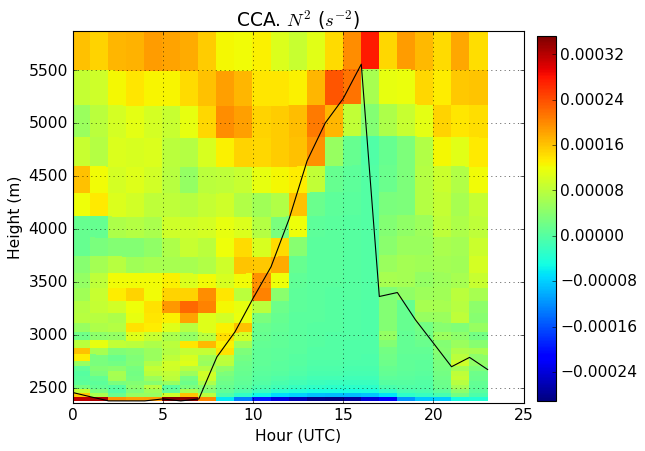

In [137]:
ym = z_24[0, :, :28]
xm, trash =np.mgrid[range(0,24), range(0,28)]

#if N[0, :,:25].max() > np.abs(N[:, :25, cca_x, cca_y].min()):
#    max_NN = N[:, :25, cca_x, cca_y].max()
    
#elif N[:, :25, cca_x, cca_y].max() < np.abs(N[:, :25, cca_x, cca_y].min()):
#    max_NN = np.abs(N[:, :25, cca_x, cca_y].min())

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

#main plot
#im = ax.pcolormesh(xm, ym, cca_density[:, :24])
im = ax.pcolormesh(xm, ym, nn_24[:, :28])#, norm= colors.Normalize(vmin=-max_NN ,vmax=max_NN))

#colorbar
fig.subplots_adjust(right=0.83)
cbar_ax = fig.add_axes([0.85, 0.13, 0.03, 0.76])
fig.colorbar(im, cax=cbar_ax)

#limits
#ax.set_xlim(0,24)
ax.set_ylim(hgt[cca_x, cca_y], max(z_24[0,:, 27]))

#Pblh curve
ax.plot(pblh_cca + hgt[cca_x, cca_y], color = 'k')
#ax.fill_between(range(24), 2500 + HGT[0,0,0],  PBLH[:, 0,0] + HGT[0,0,0], color = 'white')

#Format
ax.grid()
ax.set_ylabel('Height (m)', fontsize = 14)
ax.set_xlabel('Hour (UTC)', fontsize = 14)
ax.set_title('CCA. $N^2$ ($s^{-2}$)')
#ax.ticklabel_format(style = 'sci')
fig.savefig("cca_15_01_2015.png")

$$N^2 = \frac{g}{\theta} \frac{d \theta}{d z}$$

# velocidades sup y mean

In [110]:
u_sup_24 = h5py.File("/Volumes/BUFFALO_SOLDIER/datos_u_sup/cca/03/mar_u_sup_24_cca.h5", 'r')
u_sup_48 = h5py.File("/Volumes/BUFFALO_SOLDIER/datos_u_sup/cca/03/mar_u_sup_48_cca.h5", 'r')

In [111]:
mar_24 = h5py.File("/Volumes/BUFFALO_SOLDIER/datos_VC/03/mar_24.h5", 'r')
mar_48 = h5py.File("/Volumes/BUFFALO_SOLDIER/datos_VC/03/mar_48.h5", 'r')

In [112]:
u_sup_24 = np.array(u_sup_24.get('u_sup_24'))
u_sup_48 = np.array(u_sup_48.get('u_sup_48'))

In [113]:
u_mean_24 = np.array(mar_24.get('u_mean_24h'))
u_mean_48 = np.array(mar_48.get('u_mean_48h'))

In [114]:
cca_x

61

In [115]:
u_mean_24.shape

(31, 24, 102, 128)

In [116]:
u_mean_mar_cca_24 = np.reshape(u_mean_24[:, :, cca_x, cca_y], (31*24))

In [117]:
u_sup_mar_cca_24 = np.reshape(u_sup_24, (31*24))

In [118]:
mar_t_range = pd.date_range('2015-03-01 00:00:00','2015-03-31 23:00:00', freq='1H')

In [119]:
u_mar = pd.DataFrame({'u_sup_24' : pd.Series(u_sup_mar_cca_24, index=mar_t_range), 'u_mean_24' : pd.Series(u_mean_mar_cca_24, index=mar_t_range)})

In [120]:
u_mar.head()

                     u_mean_24  u_sup_24
2015-03-01 00:00:00   3.910806  2.277721
2015-03-01 01:00:00   1.349171  1.493428
2015-03-01 02:00:00   1.367227  1.344189
2015-03-01 03:00:00   0.322278  0.167905
2015-03-01 04:00:00   1.436967  1.453451

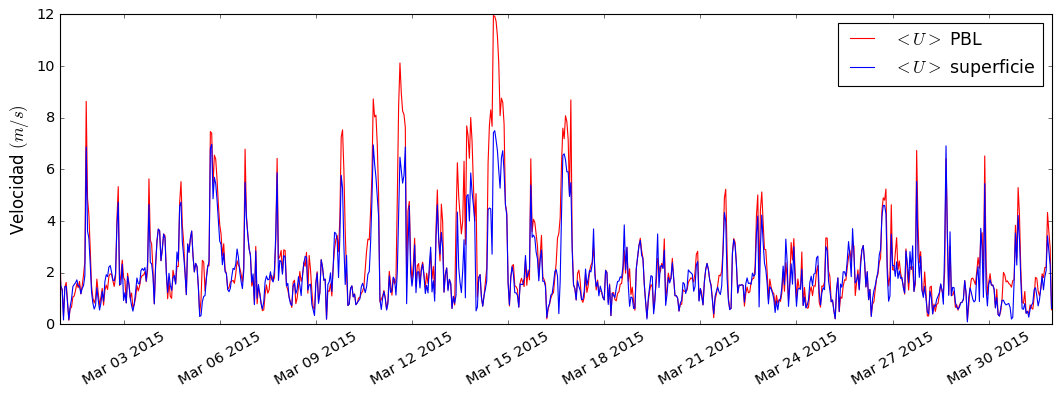

In [123]:
plt.figure(figsize=(16,5))
plt.plot(u_mar['u_mean_24'], label = '$<U>$ PBL', c = 'r')
plt.plot(u_mar['u_sup_24'], label = '$<U>$ superficie')
plt.legend()
plt.xticks(rotation=30)
plt.ylabel('Velocidad $(m/s)$', fontsize = 15)

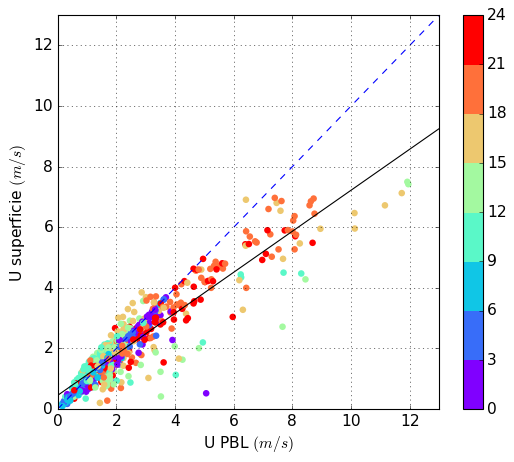

In [77]:
##Ajuste lineal
x = u_mar['u_mean_24']
y = u_mar['u_sup_24']
tag = (u_mar.index.hour)

popt, pcov = optimization.curve_fit(blt.ajuste_lineal, u_mar.dropna()['u_mean_24'], u_mar.dropna()['u_sup_24'])

# define the colormap
cmap = plt.cm.rainbow #matplotlib.colors.ListedColormap(['black','yellow', 'red', 'blue', 'white', 'green'])
# extract all colors from the .rainbow map
cmaplist = [cmap(i) for i in range(cmap.N)]
# create the new map
cmap = cmap.from_list('Custom cmap', cmaplist, cmap.N)
# define the bins and normalize
bounds = np.linspace(0,24, 9)
norm = matplotlib.colors.BoundaryNorm(bounds, cmap.N)

# make the scatter
plt.figure(figsize = (7,6))
scat = plt.scatter(x,y, cmap=cmap, norm=norm, c=tag, edgecolors='none', s = 35)

# create a second axes for the colorbar
#ax2 = plt.add_axes([0.95, 0.1, 0.03, 0.8])
#cb = matplotlib.colorbar.ColorbarBase(ax2, cmap=cmap, norm=norm, spacing='proportional', ticks=bounds, boundaries=bounds, format='%1i')

#Format
plt.ylim(0, 13)
plt.xlim(0, 13)
plt.xlabel('U PBL $(m/s)$')
plt.ylabel('U superficie $(m/s)$')
xx = np.linspace(0, 13, 10)

plt.plot(xx, blt.ajuste_lineal(xx, *popt), c = 'k') #plot linear fit
plt.plot(xx, blt.ajuste_lineal(xx, 0, 1), '--') #Plot identity
plt.rcParams.update({'font.size': 14})
#plt.title('UTC-6')
plt.grid()
plt.colorbar()
plt.tight_layout()